<a href="https://colab.research.google.com/github/jineetd/HPC-analysis/blob/dev/MLP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv('/content/Power Model Inputs (964 datasets).csv')
print(df.columns)

Index(['m', 'Benchmark', 'Kernel Name', 'C/M', 'reg_thread', 'Smem_pblock',
       'No_of_cmpinst', 'No_of_globinst', 'No_of_sharinst', 'Miscelleneous ',
       'No_of_blocks(Grid Size)', 'Threads_pbl (Block Size)', 'Occupancy',
       'Power', 'Dwarf Type', 'Unnamed: 15'],
      dtype='object')


In [0]:
df1=df.drop(['m','Benchmark','Kernel Name','C/M','Dwarf Type','Unnamed: 15'],axis=1)

In [0]:
df2=df1.iloc[0:963,:]
print(df2.shape)
df2

(963, 10)


,reg_thread,Smem_pblock,No_of_cmpinst,No_of_globinst,No_of_sharinst,Miscelleneous,No_of_blocks(Grid Size),Threads_pbl (Block Size),Occupancy,Power
0,12.0,0.0,14.0,11.0,0.0,0.0,64.0,256.0,1.00,110.32400
1,12.0,0.0,14.0,11.0,0.0,0.0,128.0,256.0,1.00,114.90400
2,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,16.0,0.25,68.71354
3,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,32.0,0.25,70.67411
4,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,64.0,0.50,77.09176
5,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,128.0,1.00,89.88434
6,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,256.0,1.00,100.25582
7,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,512.0,1.00,106.51602
8,13.0,0.0,13.0,2.0,0.0,0.0,1024.0,1024.0,1.00,107.81416
9,13.0,0.0,13.0,2.0,0.0,0.0,512.0,16.0,0.25,65.80665


In [0]:
y_train=df2['Power']
y_train=np.array(y_train).astype('float32')
y_train

array([110.324   , 114.904   ,  68.71354 ,  70.67411 ,  77.09176 ,
        89.88434 , 100.25582 , 106.51602 , 107.81416 ,  65.80665 ,
        66.85619 ,  69.5961  ,  75.97772 ,  88.17192 ,  98.86065 ,
       104.26715 ,  64.32306 ,  64.74339 ,  66.23292 ,  69.27718 ,
        75.04933 ,  88.26324 ,  98.18559 ,  63.75511 ,  63.93848 ,
        64.54728 ,  66.07364 ,  68.91873 ,  74.88151 ,  87.36835 ,
        77.41016 ,  83.77517 , 101.04933 , 121.46859 , 129.28946 ,
       131.75473 , 129.5785  ,  73.1363  ,  77.31622 ,  90.98843 ,
       107.17054 , 120.24816 , 127.41226 , 127.30467 ,  68.42724 ,
        69.78893 ,  76.53403 ,  90.23908 , 104.79997 , 118.9508  ,
       122.64322 ,  65.93886 ,  66.69967 ,  69.35899 ,  76.26762 ,
        91.086   , 104.15702 , 115.12321 ,  91.217   ,  99.13749 ,
       120.27955 , 138.09402 , 139.70341 , 137.8893  , 131.40518 ,
        91.8291  ,  99.13318 , 119.204   , 137.80232 , 139.48676 ,
       139.1979  , 132.91579 ,  86.1272  ,  95.92677 , 114.092

In [0]:
#df2['Smem_pblock']=pd.to_numeric(df2['Smem_pblock'])
x_train=df2.iloc[:,0:9]
x_train=np.array(x_train).astype('float32')
x_train

array([[1.200e+01, 0.000e+00, 1.400e+01, ..., 6.400e+01, 2.560e+02,
        1.000e+00],
       [1.200e+01, 0.000e+00, 1.400e+01, ..., 1.280e+02, 2.560e+02,
        1.000e+00],
       [1.300e+01, 0.000e+00, 1.300e+01, ..., 1.024e+03, 1.600e+01,
        2.500e-01],
       ...,
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 1.024e+03, 2.560e+02,
        1.000e+00],
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 1.024e+03, 1.024e+03,
        1.000e+00],
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 1.024e+03, 3.200e+01,
        2.500e-01]], dtype=float32)

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x_train)
print(X_scale.shape)

(963, 9)


In [0]:
#splitting the data for training and validation test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y_train, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(770, 9)
(193, 9)
(770,)
(193,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(9,)))
model.add(Dense(64, activation='exponential'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='exponential'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='relu'))
#model.add(Dense(32, activation='exponential'))
model.add(Dense(1, activation='linear'))

In [0]:
import keras
ada=keras.optimizers.Adagrad(lr=0.01)

model.compile(optimizer=ada,loss='mean_squared_error',metrics=['mse'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=3)

Train on 770 samples, validate on 193 samples
Epoch 1/100
770/770 [==============================] - 2s 3ms/step - loss: 906.1479 - mean_squared_error: 906.1479 - val_loss: 611.3678 - val_mean_squared_error: 611.3678
Epoch 2/100
770/770 [==============================] - 2s 2ms/step - loss: 667.5287 - mean_squared_error: 667.5287 - val_loss: 697.1109 - val_mean_squared_error: 697.1109
Epoch 3/100
770/770 [==============================] - 2s 2ms/step - loss: 598.9851 - mean_squared_error: 598.9851 - val_loss: 567.3256 - val_mean_squared_error: 567.3256
Epoch 4/100
770/770 [==============================] - 2s 2ms/step - loss: 599.2229 - mean_squared_error: 599.2229 - val_loss: 536.0894 - val_mean_squared_error: 536.0894
Epoch 5/100
770/770 [==============================] - 2s 2ms/step - loss: 563.3183 - mean_squared_error: 563.3183 - val_loss: 598.9043 - val_mean_squared_error: 598.9043
Epoch 6/100
770/770 [==============================] - 2s 2ms/step - loss: 556.0199 - mean_squared_

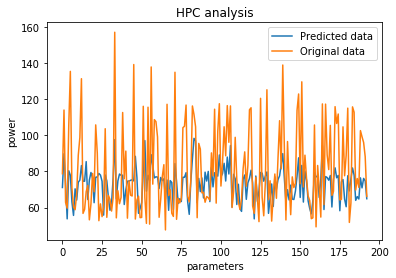

In [0]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(pred,label='Predicted data')
plt.plot(Y_test,label='Original data')
plt.legend(loc='best')
plt.ylabel('power')
plt.xlabel('parameters')
plt.title('HPC analysis')
plt.show()

In [0]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test,pred))
print(rms)

0.19453325641570673
21.406590012126305


In [0]:
model.save('MLP1.h5')